In [282]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [283]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import category_encoders as ce

In [284]:
df = pd.read_csv('fifa_eda_stats.csv')
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [285]:
df.drop(
    ['ID', 'Name', 'Nationality', 'Club', 'Wage', 'Jersey Number', 'Work Rate', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'Joined', 'Loaned From', 'Contract Valid Until', 'Release Clause'],
    axis=1,
    inplace=True
)
df.head()

,Age,Overall,Potential,Value,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKReflexes
0,31,94,94,€110.5M,Left,5.0,4.0,4.0,Messi,RF,...,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,8.0
1,33,94,94,€77M,Right,5.0,4.0,5.0,C. Ronaldo,ST,...,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,11.0
2,26,92,93,€118.5M,Right,5.0,5.0,5.0,Neymar,LW,...,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,11.0
3,27,91,93,€72M,Right,4.0,3.0,1.0,Lean,GK,...,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,94.0
4,27,91,92,€102M,Right,4.0,5.0,4.0,Normal,RCM,...,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,13.0


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Overall                   18207 non-null  int64  
 2   Potential                 18207 non-null  int64  
 3   Value                     18207 non-null  object 
 4   Preferred Foot            18159 non-null  object 
 5   International Reputation  18159 non-null  float64
 6   Weak Foot                 18159 non-null  float64
 7   Skill Moves               18159 non-null  float64
 8   Body Type                 18159 non-null  object 
 9   Position                  18147 non-null  object 
 10  Height                    18159 non-null  object 
 11  Weight                    18159 non-null  object 
 12  Crossing                  18159 non-null  float64
 13  Finishing                 18159 non-null  float64
 14  Headin

In [287]:
df['Value'].unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [288]:
nan_df = (df.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(10)

,column_name,percentage
9,Position,0.329544
21,BallControl,0.263635
32,Aggression,0.263635
24,Agility,0.263635
25,Reactions,0.263635
26,Balance,0.263635
27,ShotPower,0.263635
28,Jumping,0.263635
29,Stamina,0.263635
30,Strength,0.263635


In [289]:
intro_srt = "Number of columns with more than"
print(f"{intro_srt} {0.02}% NANs: {(nan_df.percentage > 0.2).sum()}")

Number of columns with more than 0.02% NANs: 38


In [290]:
rows_count = df.shape[0]
df = df.dropna()
df = df.reset_index(drop=True)
print("rows deleted: ", rows_count -  df.shape[0])

rows deleted:  60


In [291]:
df['Value'] = df['Value'].str.replace('€', '')
df['Value'] = df['Value'].str.replace('M', '')
df['Value'] = df['Value'].str.replace(r'(\d+)K$', lambda x: str(float(x.group(1)) / 1e3), regex=True).astype(float)
df['Value'] = df['Value'].astype(float)
df['Value'].unique()

array([1.105e+02, 7.700e+01, 1.185e+02, 7.200e+01, 1.020e+02, 9.300e+01,
       6.700e+01, 8.000e+01, 5.100e+01, 6.800e+01, 7.650e+01, 4.400e+01,
       6.000e+01, 6.300e+01, 8.900e+01, 8.350e+01, 7.800e+01, 5.800e+01,
       5.350e+01, 5.150e+01, 3.800e+01, 6.450e+01, 2.700e+01, 8.100e+01,
       6.950e+01, 5.950e+01, 6.200e+01, 7.350e+01, 5.900e+01, 4.600e+01,
       4.300e+01, 3.600e+01, 5.700e+01, 2.400e+01, 3.000e+01, 4.000e+00,
       6.400e+01, 3.050e+01, 6.250e+01, 5.200e+01, 4.500e+01, 3.400e+01,
       4.650e+01, 6.100e+01, 4.150e+01, 4.450e+01, 5.650e+01, 5.300e+01,
       5.000e+01, 5.500e+01, 3.650e+01, 4.550e+01, 4.350e+01, 3.500e+01,
       3.900e+01, 1.800e+01, 2.150e+01, 5.050e+01, 5.400e+01, 4.050e+01,
       3.750e+01, 2.850e+01, 3.700e+01, 3.200e+01, 2.600e+01, 3.300e+01,
       3.850e+01, 3.550e+01, 9.000e+00, 1.550e+01, 2.200e+01, 1.400e+01,
       4.250e+01, 3.150e+01, 4.200e+01, 2.500e+01, 2.950e+01, 3.100e+01,
       2.450e+01, 2.750e+01, 2.900e+01, 1.650e+01, 

In [292]:
df.head()

,Age,Overall,Potential,Value,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKReflexes
0,31,94,94,110.5,Left,5.0,4.0,4.0,Messi,RF,...,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,8.0
1,33,94,94,77.0,Right,5.0,4.0,5.0,C. Ronaldo,ST,...,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,11.0
2,26,92,93,118.5,Right,5.0,5.0,5.0,Neymar,LW,...,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,11.0
3,27,91,93,72.0,Right,4.0,3.0,1.0,Lean,GK,...,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,94.0
4,27,91,92,102.0,Right,4.0,5.0,4.0,Normal,RCM,...,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,13.0


In [293]:
encoder = ce.OrdinalEncoder(cols=['Preferred Foot'])
df['Preferred Foot'] = encoder.fit_transform(df['Preferred Foot'])

In [294]:
df.head()

,Age,Overall,Potential,Value,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKReflexes
0,31,94,94,110.5,1,5.0,4.0,4.0,Messi,RF,...,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,8.0
1,33,94,94,77.0,2,5.0,4.0,5.0,C. Ronaldo,ST,...,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,11.0
2,26,92,93,118.5,2,5.0,5.0,5.0,Neymar,LW,...,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,11.0
3,27,91,93,72.0,2,4.0,3.0,1.0,Lean,GK,...,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,94.0
4,27,91,92,102.0,2,4.0,5.0,4.0,Normal,RCM,...,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,13.0


In [295]:
df['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'],
      dtype=object)

In [296]:
value_counts = df['Body Type'].value_counts()
value = 'Stocky' # The particular value to check
count = value_counts[value]
print(count)

1140


In [297]:
for value in ['Messi', 'C. Ronaldo', 'Neymar', 'Courtois',
       'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa']:
    df = df[df['Body Type'] != value]
encoder = ce.OrdinalEncoder(cols=['Body Type'])
df['Body Type'] = encoder.fit_transform(df['Body Type'])

In [298]:
encoder = ce.CountEncoder(cols=['Position'])
encoder.fit(df['Position'])
df['Position'] = encoder.transform(df['Position'])

In [299]:
df['Position'].unique()

array([2024,  391,   15,  203,  662, 2151,  395, 1778,  243,  957,  948,
        206,  648, 1123,   21,  380, 1095, 1322,  248,  370, 1394, 1291,
         74,   87,   78], dtype=int64)

In [300]:
df['Height'] = df['Height'].str.replace(r"(\d+)'", lambda x: str(round(float(x.group(1)) * 30.48, 2)), regex=True)
df['Height'] = df['Height'].astype(float)

In [301]:
df['Weight'] = df['Weight'].str.replace('lbs', '').astype(float) * 0.45359237

In [302]:
df['Weight']

3        76.203518
4        69.853225
5        73.935556
6        66.224486
7        86.182550
           ...    
18142    60.781378
18143    77.110703
18144    67.131671
18145    69.853225
18146    79.832257
Name: Weight, Length: 18140, dtype: float64

In [303]:
df.drop(
    ['StandingTackle'],
    axis=1,
    inplace=True
)
df.head()

,Age,Overall,Potential,Value,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,SlidingTackle,GKReflexes
3,27,91,93,72.0,2,4.0,3.0,1.0,1,2024,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,13.0,94.0
4,27,91,92,102.0,2,4.0,5.0,4.0,2,391,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,51.0,13.0
5,27,91,91,93.0,2,4.0,4.0,4.0,2,15,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,22.0,8.0
6,32,91,91,67.0,2,4.0,4.0,4.0,1,391,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,73.0,9.0
7,31,91,91,80.0,2,5.0,4.0,3.0,2,203,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,38.0,37.0


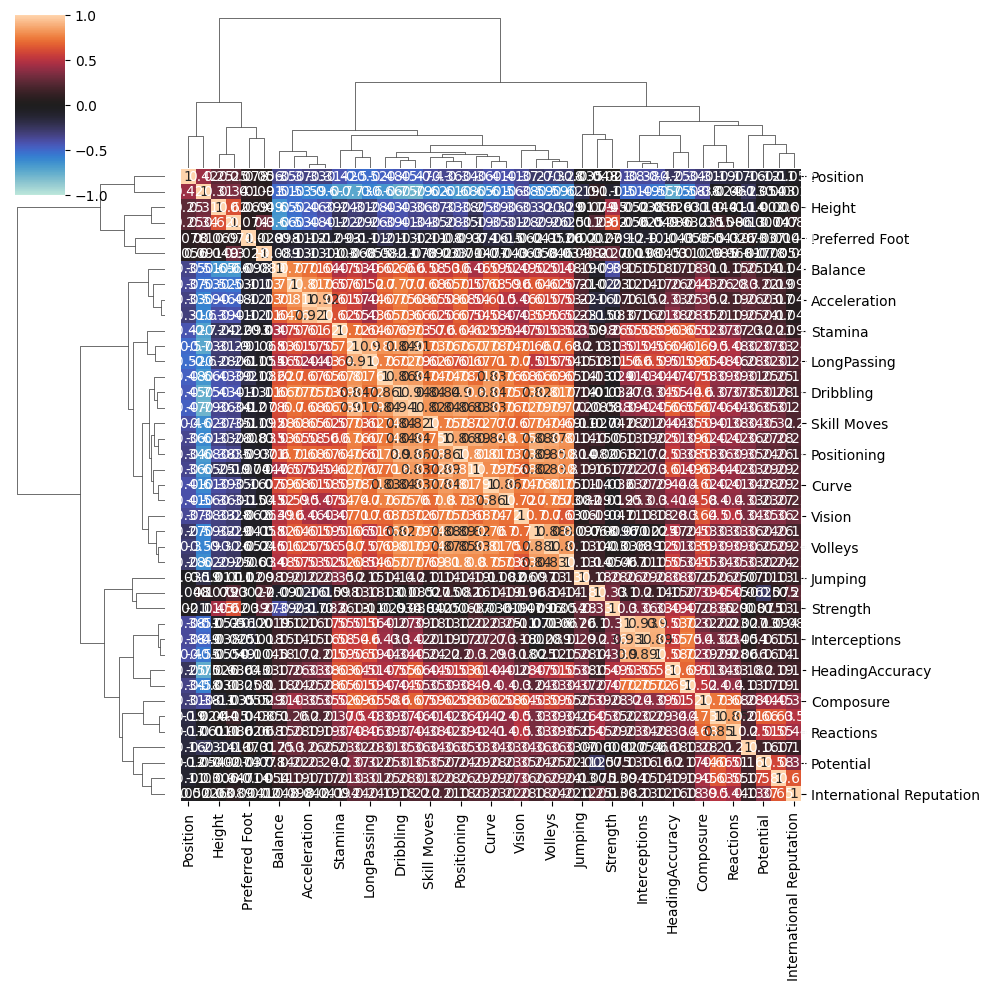

In [304]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
)

corrplot(df, annot=True)

In [305]:
# Compute correlation matrix
corr_matrix = df.corr()

# Set threshold for high correlation
threshold = 0.8

# Identify highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))
print(high_corr_pairs)
# Determine columns to delete
columns_to_delete = set()
for pair in high_corr_pairs:
    columns_to_delete.add(pair[1]) # Add the second column of each highly correlated pair

# Remove columns with high correlation
df_filtered = df.drop(columns_to_delete, axis=1)

[('Overall', 'Reactions'), ('Skill Moves', 'Dribbling'), ('Skill Moves', 'BallControl'), ('Crossing', 'ShortPassing'), ('Crossing', 'Dribbling'), ('Crossing', 'Curve'), ('Crossing', 'BallControl'), ('Finishing', 'Volleys'), ('Finishing', 'Dribbling'), ('Finishing', 'ShotPower'), ('Finishing', 'LongShots'), ('Finishing', 'Positioning'), ('Finishing', 'Penalties'), ('ShortPassing', 'Dribbling'), ('ShortPassing', 'LongPassing'), ('ShortPassing', 'BallControl'), ('Volleys', 'Dribbling'), ('Volleys', 'Curve'), ('Volleys', 'ShotPower'), ('Volleys', 'LongShots'), ('Volleys', 'Positioning'), ('Volleys', 'Penalties'), ('Dribbling', 'Curve'), ('Dribbling', 'BallControl'), ('Dribbling', 'ShotPower'), ('Dribbling', 'LongShots'), ('Dribbling', 'Positioning'), ('Curve', 'FKAccuracy'), ('Curve', 'BallControl'), ('Curve', 'LongShots'), ('Curve', 'Positioning'), ('FKAccuracy', 'LongShots'), ('BallControl', 'ShotPower'), ('BallControl', 'LongShots'), ('BallControl', 'Positioning'), ('Acceleration', 'Spr

In [308]:
df.head()

,Age,Overall,Potential,Value,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,SlidingTackle,GKReflexes
3,27,91,93,72.0,2,4.0,3.0,1.0,1,2024,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,13.0,94.0
4,27,91,92,102.0,2,4.0,5.0,4.0,2,391,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,51.0,13.0
5,27,91,91,93.0,2,4.0,4.0,4.0,2,15,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,22.0,8.0
6,32,91,91,67.0,2,4.0,4.0,4.0,1,391,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,73.0,9.0
7,31,91,91,80.0,2,5.0,4.0,3.0,2,203,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,38.0,37.0


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18140 entries, 3 to 18146
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18140 non-null  int64  
 1   Overall                   18140 non-null  int64  
 2   Potential                 18140 non-null  int64  
 3   Value                     18140 non-null  float64
 4   Preferred Foot            18140 non-null  int32  
 5   International Reputation  18140 non-null  float64
 6   Weak Foot                 18140 non-null  float64
 7   Skill Moves               18140 non-null  float64
 8   Body Type                 18140 non-null  int32  
 9   Position                  18140 non-null  int64  
 10  Height                    18140 non-null  float64
 11  Weight                    18140 non-null  float64
 12  Crossing                  18140 non-null  float64
 13  Finishing                 18140 non-null  float64
 14  HeadingAccu

In [306]:
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(exclude=['object'])

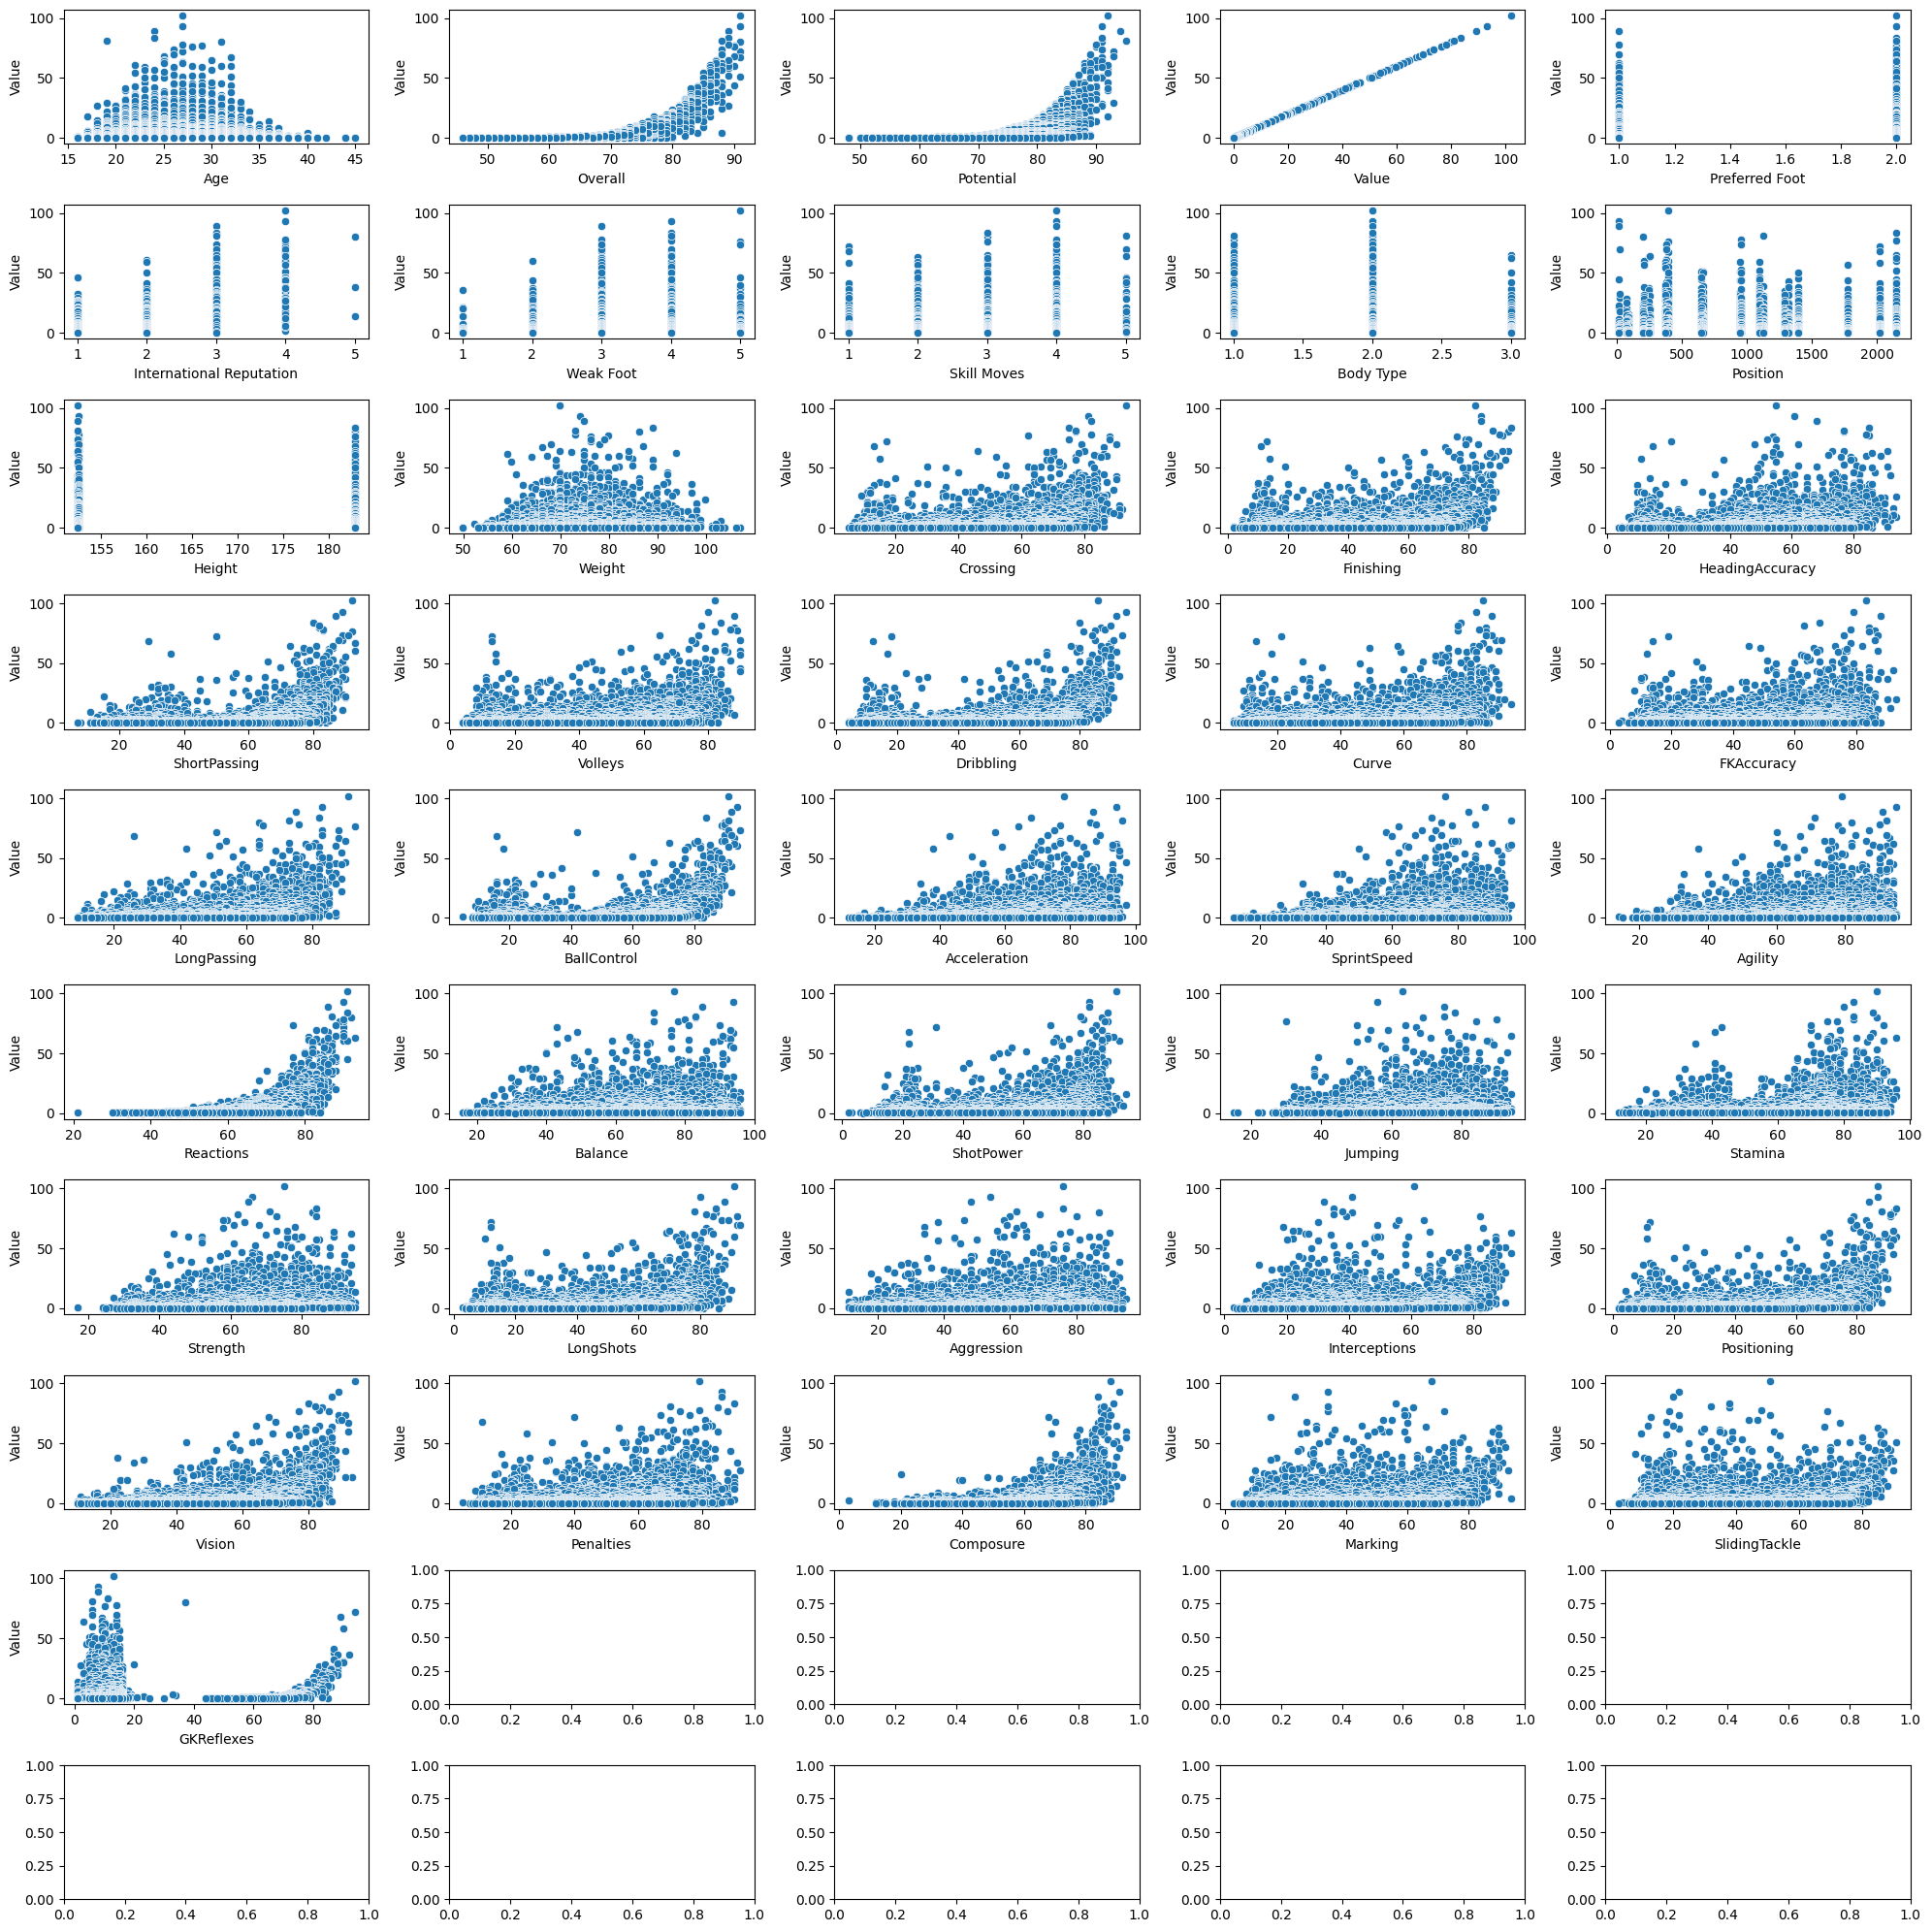

In [307]:
fig, axes = plt.subplots(10, 5, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='Value',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)